## Problem Statement


- Profiling the best companies and job positions to work for from the Scaler database.
- Clustering the learners on the basis of their job profile, company, and other features.


#### Concept Used:

- Manual Clustering
- Unsupervised Clustering - K- means, Hierarchical Clustering




In [84]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (12,8)

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("scaler_clustering.csv",index_col=0)

In [4]:
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
32773,zhwrtho ogenfvqt,5beab3e022fe7704954f7ce66047e9335588cd483d9d4d...,2023.0,98900000,FullStack Engineer,2021.0
167665,wgszxkvzn,022dd28413ab1ebcec604b3528441b686b0174d2bbdf6e...,2008.0,103000,FullStack Engineer,2021.0
94617,atrgxnnt,3bdaaf20ba7fbbcdfe80e63ba285a6760160c2bd7e6f47...,2014.0,1600000,QA Engineer,2021.0
115361,ywr ntwyzgrgsxto,fd3c3f85bf3e995fb7e99daa125a532eb04cd28f0c8461...,2016.0,1090000,NaN,2019.0
89262,xzntr wgqugqvnxgz,e0f3c434b906b63344eaa01cd6a14b0e15fbf471245074...,2017.0,1800000,Other,2021.0
51990,exatrxnj xzctonbtzno,b43a9dfe14227b0c01565782479b618d476272e750effc...,2012.0,1050000,Backend Engineer,2017.0
179837,zx zvnxgzvr xzonqhbtzno,4ba864840f28b60a94e54b24ec66ceba588182cd55a24a...,2018.0,1350000,FullStack Engineer,2020.0
179953,vrnvxq,0c41a4de7a6014e5dc3528b37d28f1c8574636a743499e...,2013.0,800000,SDET,2019.0
14640,uhmrxwxo ovuxtzn,25ff9ad29e16f59f205c1d42e0b1d678ba3b213efd1c32...,2018.0,550000,Frontend Engineer,2015.0
127568,tdutaxv xzw,b716b89a03a6b3c75f4b21d5dff38e8f01e2929869bb03...,2012.0,2000000,Backend Engineer,2018.0


In [5]:
df.shape

(205843, 6)

In [6]:
# 205843 learners data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [8]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [9]:
(df.isna().sum()/ len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [10]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [11]:
# based on above information , noticing some unusual outliers in the data  

In [12]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


### Using Regex to clean Company Hash

In [13]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string
    
mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [14]:
df["company_hash"].nunique()

37299

In [15]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x))) 
df["company_hash"].nunique()

37208

In [16]:
df["job_position"].nunique()
# 1017 unique job positions are there in the dataset 

1017

In [17]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x))) 
df["job_position"].nunique()

# 857 unique job positions are there in the dataset after preprocessing strings 

857

In [18]:
# removing the email_hash
df.drop("email_hash",axis = 1,inplace=True)

In [19]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
32385,uhmrxwxo ovuxtzn,2016.0,1100000,backend engineer,2019.0
150664,gutz lhxwt ntwyzgrgsxto,2017.0,650000,fullstack engineer,2019.0
144284,vwwhqv xzahonqxto,2017.0,1200000,qa engineer,2019.0
18253,axbno,2006.0,1300000,backend engineer,2021.0
26924,zgn vuurxwvmrt vwwghzn,2021.0,10000,other,2021.0


In [20]:
df.duplicated().sum() # 17597 duplicated records

17597

In [21]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [22]:
(df["company_hash"] == "").sum()

89

In [23]:
(df["company_hash"] == "nan").sum()

44

In [24]:
(df["job_position"] == "").sum()

9

In [25]:
(df["job_position"] == "nan").sum()

52562

In [26]:
# removing the records where company or job_position reocords are not available 

In [27]:
df[(df["company_hash"] == "") | (df["job_position"] == "")].sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
86550,,2021.0,100000000,nan,2019.0
198561,,2017.0,300000,other,2020.0
66088,,2007.0,2300000,fullstack engineer,2019.0
86758,,2019.0,700000,nan,2019.0
2940,,2020.0,100000,nan,2020.0
161691,yaew mvzp,2001.0,100000000,,2021.0
200558,,2018.0,1000000,other,2019.0
197495,,2020.0,2700000,nan,2019.0
5797,seo gxr svo axcxoxgz,2011.0,700000,,2021.0
87642,,2016.0,500000,fullstack engineer,2018.0


In [28]:
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])

98

In [29]:
# df[((df["company_hash"] != "") & (df["job_position"] != ""))]

In [30]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


# Data Preprocessing 

## Handling Missing values-Imputation


In [31]:
df["orgyear"].isna().sum()

86

### imputing Employee Start Year as per the median year as per each company.

In [32]:
df.groupby("company_hash")["orgyear"].transform("median")

0         2014.0
1         2016.0
2         2015.0
3         2016.0
4         2017.0
           ...  
206918    2018.0
206919    2017.0
206920    2016.0
206921    2020.0
206922    2015.0
Name: orgyear, Length: 205745, dtype: float64

In [33]:
#df["orgyear"].fillna(df['orgyear'].isnull().sum(),inplace=True)

In [34]:
df["orgyear"].isna().sum()

0

In [35]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
25912,hzxexta ntwy sqghu xzw,2020.0,6000000,data analyst,2020.0
98719,wvustbxzx,2016.0,620000,fullstack engineer,2021.0
113597,nvqstn,2006.0,2250000,nan,2021.0
81678,zvz,2020.0,400000,nan,2021.0
175253,eqtoytq,2018.0,1300000,other,2019.0


# Outliers  Treatment : 

- ### employment start year 

In [40]:
df["orgyear"].value_counts()

2018.0    25240
2019.0    23402
2017.0    23237
2016.0    23038
2015.0    20602
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 78, dtype: int64

In [94]:
df["orgyear"]=df["orgyear"].astype('int')

In [51]:
df["orgyear"].unique()

[2016.0, 2018.0, 2015.0, 2017.0, 2019.0, ..., 1995.0, 1992.0, 1991.0, 1998.0, 1993.0]
Length: 33
Categories (33, float64): [1990.0, 1991.0, 1992.0, 1993.0, ..., 2019.0, 2020.0, 2021.0, 2022.0]

<Axes: xlabel='orgyear', ylabel='Count'>

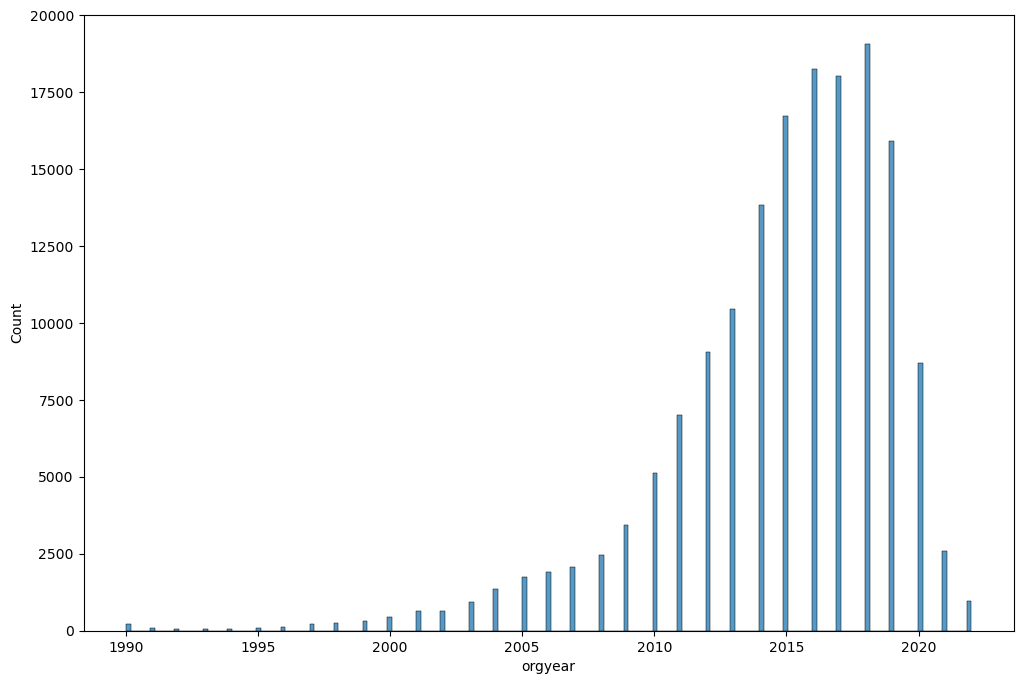

In [194]:
sns.histplot(df["orgyear"])


In [57]:
df.dtypes

company_hash          object
orgyear             category
ctc                    int64
job_position          object
ctc_updated_year     float64
dtype: object

In [ ]:
# sns.histplot(np.log(df["orgyear"]))

In [42]:
df["orgyear"].quantile(0.001)

1990.0

In [43]:
df["orgyear"].quantile(0.999)

2023.0

In [44]:
df["orgyear"] = df["orgyear"].clip(1990,2022)

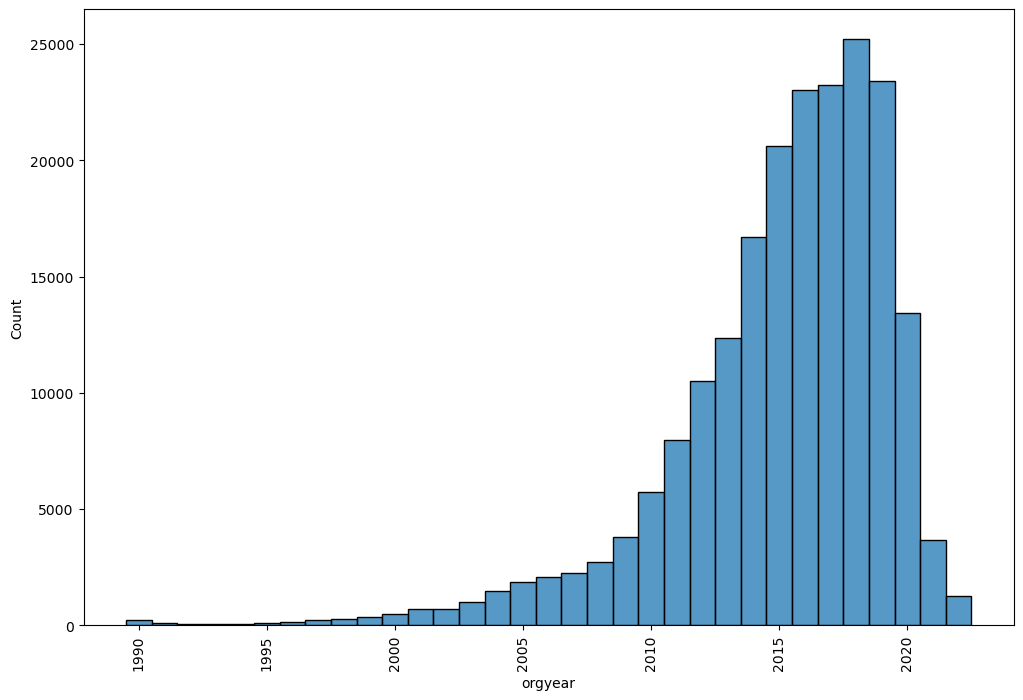

In [59]:
sns.histplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

- ### ctc updated_year  

In [60]:
df["ctc_updated_year"].quantile(0.001)

2015.0

In [61]:
df["ctc_updated_year"].quantile(0.99)

2021.0

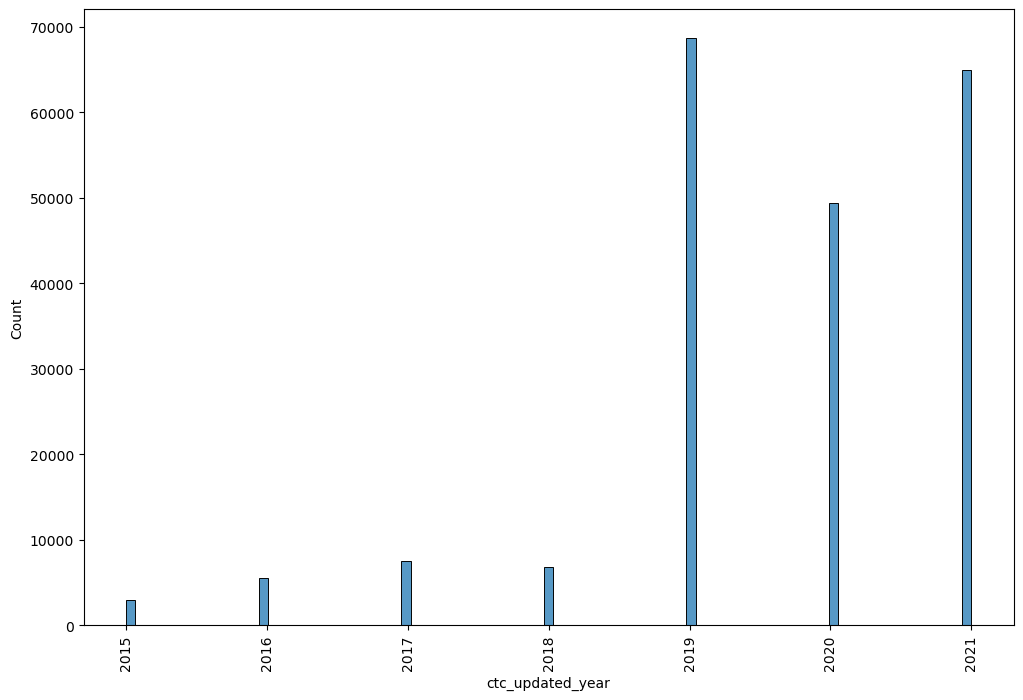

In [63]:
sns.histplot(df["ctc_updated_year"])
plt.xticks(rotation = 90)
plt.show()

- ### outlier treatment for CTC 

In [64]:
df["ctc"].quantile(0.01)

37000.0

In [65]:
df["ctc"].quantile(0.999)

200000000.0

In [66]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]

In [67]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


<Axes: xlabel='ctc', ylabel='Density'>

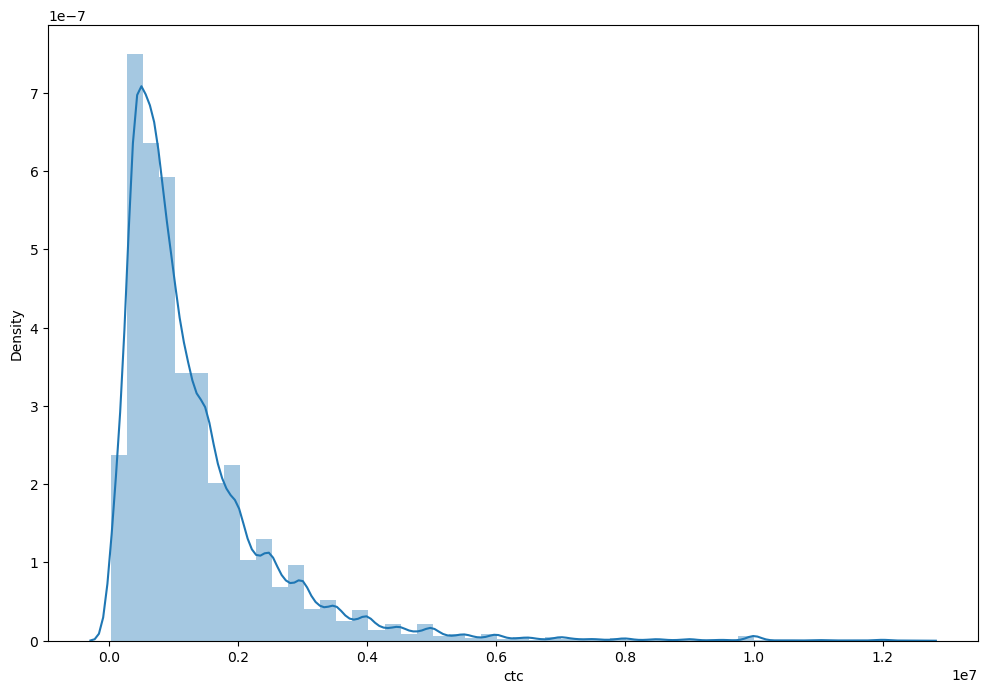

In [70]:
sns.distplot(df["ctc"])

- replacing string "nan" to np.nan 

In [71]:
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [72]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan

In [73]:
# df.company_hash.value_counts(dropna=False)

In [74]:
# df.job_position.value_counts(dropna=False)

# Feature Engineering 

### Masked company name to "Others" having count less than 5 

In [75]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [76]:
(df["company_hash"] == "Others").sum()

46434

In [77]:
# df.company_hash.value_counts(dropna=False)

In [78]:
df['orgyear'].describe()

count     201625.0
unique        33.0
top         2018.0
freq       24739.0
Name: orgyear, dtype: float64

#### years of experience =  current year - employement start year

In [196]:
import datetime

In [197]:
# years of experience 
df["years_of_experience_in_organization"] = datetime.datetime.now().year - df["orgyear"].astype(int) 


In [81]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
192205,vcxog xzw,2015.0,1000000,backend engineer,2019.0,8
180674,wqtaxncxajv,2017.0,1500000,backend engineer,2020.0,6


<Axes: xlabel='years_of_experience_in_organization', ylabel='Count'>

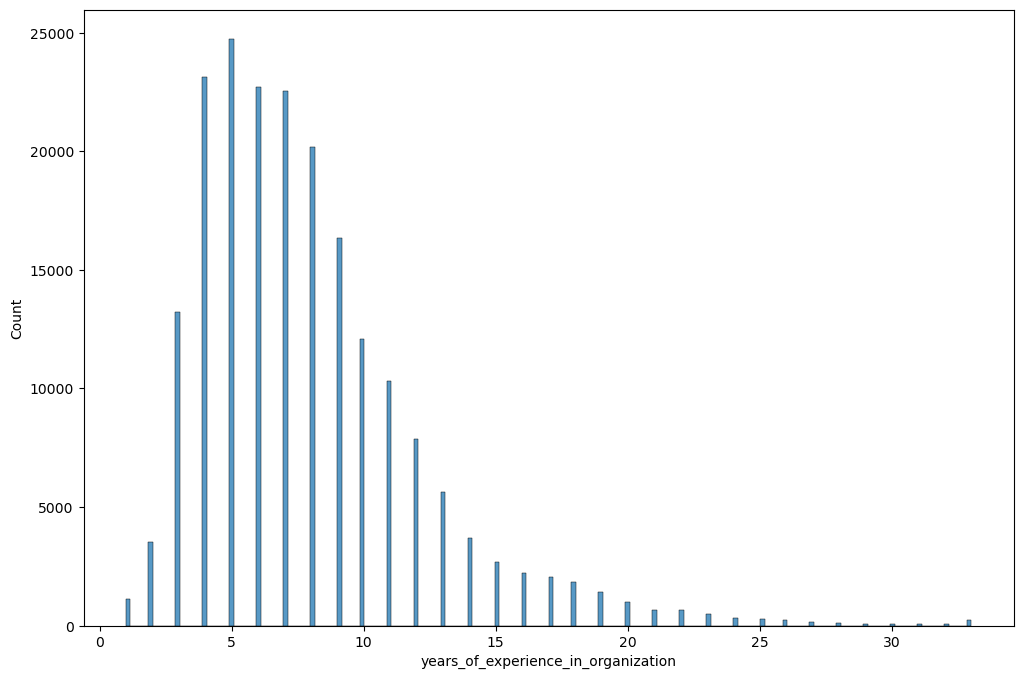

In [86]:
sns.histplot(df["years_of_experience_in_organization"])

In [87]:
df.duplicated().sum()


37683

In [88]:
df.drop_duplicates(inplace=True)
df.shape

(163942, 6)

In [89]:
df.isna().sum()


company_hash                              42
orgyear                                    0
ctc                                        0
job_position                           36745
ctc_updated_year                           0
years_of_experience_in_organization        0
dtype: int64

#### treating records having ctc_updated_year higher than their organization joining year


In [91]:
# records having ctc_updated_year higher than their organization joining year
(df["ctc_updated_year"] < df["orgyear"].astype(int)).sum()

7181

In [92]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)

In [95]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

0

In [96]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
26563,xmb xzaxv uqxcvnt rxbxnta,2014,450000,support engineer,2020.0,9
59821,uhmrxwxo ovuxtzn,2014,550000,NaN,2019.0,9


####  Filling null values with others  -- if not done before


In [97]:
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [98]:
df.isna().sum()


company_hash                           0
orgyear                                0
ctc                                    0
job_position                           0
ctc_updated_year                       0
years_of_experience_in_organization    0
dtype: int64

In [99]:
df.duplicated().sum()


1061

In [100]:
 df.drop_duplicates(inplace=True)


In [101]:
# glacing over data after outlier treatment and preprocessing 

In [102]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,162881.000000,1.628810e+05,162881.000000,162881.000000
mean,2014.740154,1.428152e+06,2019.594274,8.259846
std,4.396876,1.305734e+06,1.335473,4.396876
min,1990.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.040000e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2022.000000,1.250000e+07,2022.000000,33.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162881 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   company_hash                         162881 non-null  object 
 1   orgyear                              162881 non-null  int32  
 2   ctc                                  162881 non-null  int64  
 3   job_position                         162881 non-null  object 
 4   ctc_updated_year                     162881 non-null  float64
 5   years_of_experience_in_organization  162881 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 7.5+ MB


<Axes: xlabel='ctc', ylabel='years_of_experience_in_organization'>

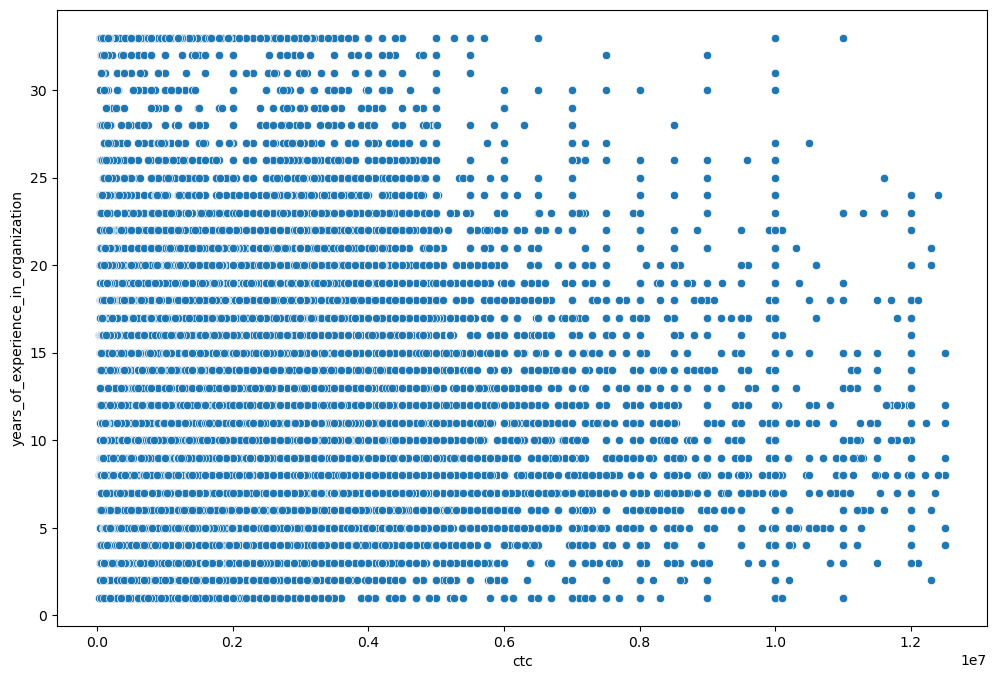

In [106]:
sns.scatterplot(x='ctc', y='years_of_experience_in_organization', data=df)

In [107]:
df.columns


Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization'],
      dtype='object')

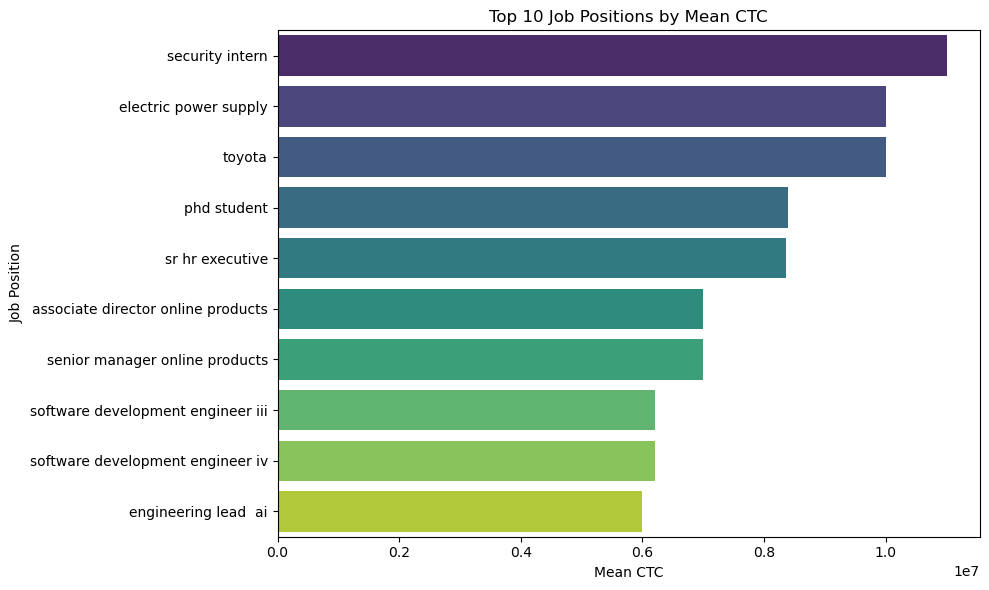

In [201]:
# Calculate the mean CTC for each job position
mean_ctc_by_position = df.groupby('job_position')['ctc'].mean().reset_index()

# Sort by mean CTC and select top N job positions
top_n_positions = 10  # Change this value to select top N job positions
top_n_mean_ctc = mean_ctc_by_position.nlargest(top_n_positions, 'ctc')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='ctc', y='job_position', data=top_n_mean_ctc, palette='viridis')
plt.xlabel('Mean CTC')
plt.ylabel('Job Position')
plt.title(f'Top {top_n_positions} Job Positions by Mean CTC')
plt.tight_layout()
plt.show()

In [208]:
mean_ctc_by_position = df.groupby('job_position')['ctc'].mean()

# Find the top job positions by mean CTC
top_job_positions = mean_ctc_by_position.nlargest(100)

# Print the top job positions
print("Top job positions by mean CTC:")
print(top_job_positions)

Top job positions by mean CTC:
job_position
security intern                 1.100000e+07
electric power supply           1.000000e+07
toyota                          1.000000e+07
phd student                     8.400000e+06
sr hr executive                 8.360000e+06
                                    ...     
teaching assistant              2.482667e+06
associate principal engineer    2.462000e+06
sde intern                      2.450000e+06
escalation engineer             2.425000e+06
research assistant              2.420400e+06
Name: ctc, Length: 100, dtype: float64


In [203]:
df.ctc.max()

12500000

In [209]:
# Filter the DataFrame for job positions containing "data scientist" (case-insensitive)
data_scientist_positions = df[df['job_position'].str.lower().str.contains('data scientist', case=False)]

# Calculate the mean CTC for data scientist positions
data_scientist_mean_ctc = data_scientist_positions['ctc'].mean()

# Group the data by job position and calculate the mean CTC for each position
mean_ctc_by_position = df.groupby(df['job_position'].str.lower())['ctc'].mean()

# Find the top 10 job positions by mean CTC
top_10_job_positions = mean_ctc_by_position.nlargest(10)

# Print the mean CTC for data scientist positions
print("Mean CTC for job positions containing 'data scientist':", data_scientist_mean_ctc)

# Print the top 10 job positions by mean CTC
print("\nTop 10 job positions by mean CTC:")
print(top_10_job_positions)


Mean CTC for job positions containing 'data scientist': 1556937.4285407725

Top 10 job positions by mean CTC:
job_position
security intern                       11000000.0
electric power supply                 10000000.0
toyota                                10000000.0
phd student                            8400000.0
sr hr executive                        8360000.0
associate director online products     7000000.0
senior manager online products         7000000.0
software development engineer iii      6200000.0
software development engineer iv       6200000.0
engineering lead  ai                   6000000.0
Name: ctc, dtype: float64


In [211]:
# Group the data by job position and calculate the mean CTC for each position
mean_ctc_by_position = df.groupby('job_position').agg({'ctc': 'mean', 'job_position': 'size'})

# Calculate the 50th percentile of the record count by job position
percentile_50 = mean_ctc_by_position['job_position'].quantile(0.25)

# Filter out positions where the count is below the 50th percentile
mean_ctc_by_position_filtered = mean_ctc_by_position[mean_ctc_by_position['job_position'] > percentile_50]

# Find the top job positions by mean CTC
top_job_positions = mean_ctc_by_position_filtered.nlargest(10, 'ctc')

# Print the top job positions
print("Top job positions by mean CTC with record count greater than 50th percentile:")
print(top_job_positions)


Top job positions by mean CTC with record count greater than 50th percentile:
                                        ctc  job_position
job_position                                             
cto                            5.500000e+06             2
vice president                 4.400000e+06             3
staff software engineer        3.800000e+06             3
solutions architect            3.650000e+06             2
engineering manager ii         3.600000e+06             3
computer scientist             3.590000e+06             2
software enginner              3.444250e+06             4
sdei                           3.225000e+06             2
software development engineer  3.151429e+06            21
sr technical architect         3.150000e+06             2


### Manual Clustering based on Company , Job position and Years of experience

### Learner's "designation_in_organization" flag


In [108]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization",
                                                         "job_position",
                                                         "company_hash"])["ctc"].describe() 

In [109]:
GROUPED_CTC

count  \
years_of_experience_in_organization job_position       company_hash                               
1                                   Others             Others                              48.0   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz        1.0   
                                                       atrgxnnt                             1.0   
                                                       atrr                                 1.0   
                                                       atrr ntwyzgrgsxto                    2.0   
...                                                                                         ...   
33                                  qa engineer        hzxntaytvrny sqghu                   1.0   
                                                       tmxd ogenfvqt xzaxv ucn rna          1.0   
                                                       utrvnqg ogrhnxgzo ucnrna             1.0   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx    1.0   
                                    support engineer   Others                               2.0   

                                                                                                  mean  \
years_of_experience_in_organization job_position       company_hash                                      
1                                   Others             Others                             1.649375e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz      1.600000e+06   
                                                       atrgxnnt                           1.000000e+06   
                                                       atrr                               1.000000e+06   
                                                       atrr ntwyzgrgsxto                  1.000000e+06   
...                                                                                                ...   
33                                  qa engineer        hzxntaytvrny sqghu                 5.400000e+05   
                                                       tmxd ogenfvqt xzaxv ucn rna        1.220000e+06   
                                                       utrvnqg ogrhnxgzo ucnrna           6.000000e+05   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx  1.400000e+06   
                                    support engineer   Others                             3.700000e+05   

                                                                                                   std  \
years_of_experience_in_organization job_position       company_hash                                      
1                                   Others             Others                             2.198937e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz               NaN   
                                                       atrgxnnt                                    NaN   
                                                       atrr                                        NaN   
                                                       atrr ntwyzgrgsxto                  2.828427e+05   
...                                                                                                ...   
33                                  qa engineer        hzxntaytvrny sqghu                          NaN   
                                                       tmxd ogenfvqt xzaxv ucn rna                 NaN   
                                                       utrvnqg ogrhnxgzo ucnrna                    NaN   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx           NaN   
                                    support engineer   Others                             3.252691e+05   

                                            

In [110]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
        on = ["years_of_experience_in_organization",
              "job_position",
              "company_hash"],
        how = "left")

In [111]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016,1100000,other,2020.0,7,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019.0,5,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015,2000000,backend engineer,2020.0,8,439.0,1.270462e+06,1.406560e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0
3,ngpgutaxv,2017,700000,backend engineer,2019.0,6,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017,1400000,fullstack engineer,2019.0,6,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162876,vuurt xzw,2008,220000,Others,2019.0,15,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
162877,husqvawgb,2017,500000,Others,2020.0,6,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
162878,vwwgrxnt,2021,700000,Others,2021.0,2,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
162879,zgn vuurxwvmrt,2019,5100000,Others,2019.0,4,111.0,1.423854e+06,1.758640e+06,45000.0,400000.0,730000.0,1550000.0,10000000.0


In [112]:
def classification(x,ctc_50,ctc_75):
    if x < ctc_50:
        return 3
    elif x >= ctc_50 and x <= ctc_75:
        return 2
    elif  x >= ctc_75:
        return 1

#### whichever learner has ctc compared to their years of experience , respective company , position
#### giving designation as 3 when ctc is < 50th percentile in his position ,experience and company
#### giving designation as 2 when ctc is between  50th and 75th percentile in his position ,experience and company
#### giving designation as 1 when ctc is > 75th percentile in his position ,experience and company

In [113]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x["ctc"],x["50%"],x["75%"]),axis = 1)

In [114]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016,1100000,other,2020.0,7,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019.0,5,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015,2000000,backend engineer,2020.0,8,439.0,1.270462e+06,1.406560e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017,700000,backend engineer,2019.0,6,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017,1400000,fullstack engineer,2019.0,6,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162876,vuurt xzw,2008,220000,Others,2019.0,15,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
162877,husqvawgb,2017,500000,Others,2020.0,6,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
162878,vwwgrxnt,2021,700000,Others,2021.0,2,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
162879,zgn vuurxwvmrt,2019,5100000,Others,2019.0,4,111.0,1.423854e+06,1.758640e+06,45000.0,400000.0,730000.0,1550000.0,10000000.0,1


In [115]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)

2    0.456880
3    0.331101
1    0.212020
Name: designation_in_organization, dtype: float64

In [116]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016,1100000,other,2020.0,7,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019.0,5,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015,2000000,backend engineer,2020.0,8,439.0,1.270462e+06,1.406560e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017,700000,backend engineer,2019.0,6,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017,1400000,fullstack engineer,2019.0,6,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162876,vuurt xzw,2008,220000,Others,2019.0,15,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
162877,husqvawgb,2017,500000,Others,2020.0,6,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
162878,vwwgrxnt,2021,700000,Others,2021.0,2,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
162879,zgn vuurxwvmrt,2019,5100000,Others,2019.0,4,111.0,1.423854e+06,1.758640e+06,45000.0,400000.0,730000.0,1550000.0,10000000.0,1


In [117]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)


In [118]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,2016,1100000,other,2020.0,7,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019.0,5,3
2,Others,2015,2000000,backend engineer,2020.0,8,1
3,ngpgutaxv,2017,700000,backend engineer,2019.0,6,3
4,qxen sqghu,2017,1400000,fullstack engineer,2019.0,6,2
...,...,...,...,...,...,...,...
162876,vuurt xzw,2008,220000,Others,2019.0,15,2
162877,husqvawgb,2017,500000,Others,2020.0,6,3
162878,vwwgrxnt,2021,700000,Others,2021.0,2,2
162879,zgn vuurxwvmrt,2019,5100000,Others,2019.0,4,1


In [119]:
df_GROUPED_CTC_BY_E_P_C.shape

(162881, 7)

## Manual Clustering on company and job position 

##### grouping by each job_position and company ,
##### finding which class of job an individual have, 
##### based on his ctc compared to his job_position and respective company.

In [120]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count  \
job_position          company_hash                                       
Others                Others                                    3364.0   
                      a ntwyzgrgsxto                               6.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      abwavnv ojontb                               1.0   
                      adw ntwyzgrgsj                              69.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       2.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.378793e+06   
                      a ntwyzgrgsxto                            1.229167e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      abwavnv ojontb                            7.000000e+05   
                      adw ntwyzgrgsj                            8.502319e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    3.000000e+05   

                                                                         std  \
job_position          company_hash                                             
Others                Others                                    1.458746e+06   
                      a ntwyzgrgsxto                            1.401465e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN   
                      abwavnv ojontb                                     NaN   
                      adw ntwyzgrgsj                            1.036041e+06   
...                                                                      ...   
wordpress developer   Others                                             NaN   
worker                zgn vuurxwvmrt vwwghzn                             NaN   
x                     Others                                             NaN   
young professional ii sgctqzbtzn ge xzaxv                                NaN   
zomato                kgbvng                                    2.828427e+05   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                     40000.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      abwavnv ojontb                            700000.0   
                      adw ntwyzgrgsj                             80000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    100000.0   

                               

In [121]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')


In [122]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
142784,wvqo,2017,1500000,backend engineer,2020.0,6,4.0,1.575000e+06,590903.263375,800000.0,1325000.0,1650000.0,1900000.0,2200000.0
49467,vbagwo,2017,760000,Others,2019.0,6,206.0,9.806747e+05,712470.218647,300000.0,600000.0,800000.0,1165000.0,7000000.0
140136,vxqntr,2014,1720000,backend engineer,2019.0,9,72.0,1.594569e+06,715433.804293,200000.0,1187500.0,1573000.0,1850000.0,3800000.0
75028,athnowyt mvzp,2020,1200000,Others,2021.0,3,52.0,1.684462e+06,714108.848352,140000.0,1345000.0,1560000.0,1865000.0,3600000.0
63337,fyttrotjt,2019,300000,other,2021.0,4,2.0,3.000000e+05,0.000000,300000.0,300000.0,300000.0,300000.0,300000.0


In [123]:
# creating classes basis on the salary in their respective company

In [124]:
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [125]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
42659,wgszxkvzn,2014,500000,other,2021.0,9,333.0,7.114895e+05,512633.620219,92000.0,400000.0,600000.0,800000.0,4298000.0,3
113587,bvqctrr otbxwgzahwngq,2011,1250000,qa engineer,2017.0,12,6.0,1.360833e+06,227605.286992,1200000.0,1212500.0,1250000.0,1437500.0,1765000.0,2
122447,evwnotn,2017,1500000,fullstack engineer,2019.0,6,55.0,1.336818e+06,635255.574340,151000.0,1000000.0,1200000.0,1485000.0,3700000.0,1
87442,vuuwxzg,2019,200000,Others,2021.0,4,3.0,6.266667e+05,515881.123257,200000.0,340000.0,480000.0,840000.0,1200000.0,3
6354,ssp ntwy,2018,700000,backend engineer,2019.0,5,18.0,9.021111e+05,390825.203728,450000.0,600750.0,750000.0,1237500.0,1600000.0,3


In [126]:
df_GROUPED_C_J.classs.value_counts(normalize=True)

3    0.434931
2    0.320381
1    0.244688
Name: classs, dtype: float64

In [127]:
df_GROUPED_C_J.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)


In [128]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                          2016
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization                 7
designation_in_organization                         2
Name: 0, dtype: object

In [129]:
df_GROUPED_C_J.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                          2016
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization                 7
classs                                              1
Name: 0, dtype: object

In [130]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash',
                                                      'orgyear',
                                                      'ctc',
                                                      'job_position',
                                                      'years_of_experience_in_organization',
                                                      'ctc_updated_year'], how='left')


In [131]:
df_Grouped.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs
19335,eqtjq tztqsj,2009,1050000,product manager,2020.0,14,3,3
107967,atrr tbw,2018,2100000,engineering intern,2019.0,5,1,1
13135,nyghsynfgqpo,2015,1000000,backend engineer,2021.0,8,3,3
62119,ktgnvu,2017,100000,data scientist,2021.0,6,2,2
30809,zg wgbuvzj,2018,100000,backend engineer,2018.0,5,2,3


In [132]:
df_Grouped.shape

(162881, 8)

## Manual Clustering based on comapny

##### Based on ctc per company , assigning company as tier 1 2 and 3 per each learner

In [133]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')


In [134]:
df_company.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
128854,tzctonztn,2018,2300000,Others,2019.0,5,143.0,1.336489e+06,8.113734e+05,200000.0,800000.0,1000000.0,1799999.5,4800000.0
10400,evwtmggp,2018,1200000,devops engineer,2020.0,5,81.0,1.904590e+06,2.178990e+06,60000.0,190000.0,1200000.0,3000000.0,10000000.0
152601,xzegojo,2020,720000,qa engineer,2021.0,3,2955.0,7.529379e+05,7.490931e+05,50000.0,409999.0,550000.0,819999.5,12350000.0
101944,zvsvqqg,2015,750000,frontend engineer,2019.0,8,700.0,1.205581e+06,8.164115e+05,68000.0,700000.0,1000000.0,1500000.0,11400000.0
66834,rvqotz nghmqg,2016,1270000,research engineers,2020.0,7,179.0,9.318771e+05,8.530959e+05,101000.0,500000.0,700000.0,1200000.0,10000000.0


In [135]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [170]:
 df_company.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,tier
32294,tkt ogenfvqt,2016,1000000,backend engineer,2019.0,7,3
94150,wxnxsqghu,2020,1630000,Others,2021.0,3,2
105592,Others,2014,950000,ios engineer,2017.0,9,2
85050,vbvkgz,2018,2000000,fullstack engineer,2021.0,5,2
61520,btzngq sqvuyxwo,2016,1700000,backend engineer,2019.0,7,3


In [188]:
df3=df_company[df_company['tier']==1].sort_values('ctc',ascending=False)

### 1.Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [189]:
df3.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,tier
85657,zgn vuurxwvmrt vwwghzn,2019,12500000,frontend engineer,2021.0,4,1
13883,vrnxbtnqxp,2012,12500000,fullstack engineer,2020.0,11,1
143898,bxwqgogen,2014,12500000,fullstack engineer,2019.0,9,1
52121,uvjuvr,2015,12500000,backend engineer,2017.0,8,1
52593,zvz,2019,12500000,Others,2019.0,4,1
58259,vbvkgz,2011,12500000,other,2018.0,12,1
65795,Others,2008,12500000,Others,2020.0,15,1
103428,xzntr wgqugqvnxgz,2018,12500000,frontend engineer,2019.0,5,1
94585,zgn vuurxwvmrt vwwghzn,2019,12500000,other,2021.0,4,1
58719,wmqt,2018,12500000,frontend engineer,2020.0,5,1


### 2.Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [190]:
df4=df_company[df_company['tier']==3].sort_values('ctc')

In [191]:
df4.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,tier
158843,xb v onhatzn,2022,38000,Others,2022.0,1,3
52651,Others,2007,38000,devops engineer,2018.0,16,3
76476,zgn vuurxwvmrt vwwghzn,2015,38000,frontend engineer,2021.0,8,3
113786,Others,2015,38000,other,2017.0,8,3
106607,zgzt,2017,39000,backend engineer,2017.0,6,3
144607,bwpxzotj,2020,39000,data scientist,2021.0,3,3
75425,Others,2017,39000,backend engineer,2020.0,6,3
19093,rvkvav sqghu,2013,39000,backend engineer,2020.0,10,3
123487,bwpxzotj,2020,39000,Others,2021.0,3,3
30456,vnytzvytvrny,2007,39550,Others,2019.0,16,3


In [137]:
df_company.tier.value_counts(normalize=True)

3    0.476931
2    0.282998
1    0.240071
Name: tier, dtype: float64

In [138]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],
               axis = 1,
               inplace=True)

In [139]:
df_company.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                          2016
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization                 7
tier                                                2
Name: 0, dtype: object

In [140]:
df_Grouped.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                          2016
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization                 7
designation_in_organization                         2
classs                                              1
Name: 0, dtype: object

In [141]:
df_Grouped = df_Grouped.merge(df_company,
                 on=['company_hash',
                     'orgyear','ctc',
                     'job_position',
                     'years_of_experience_in_organization',
                     'ctc_updated_year'
                    ])

In [142]:
df_Grouped

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,atrgxnnt xzaxv,2016,1100000,other,2020.0,7,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019.0,5,3,3,3
2,Others,2015,2000000,backend engineer,2020.0,8,1,1,1
3,ngpgutaxv,2017,700000,backend engineer,2019.0,6,3,3,3
4,qxen sqghu,2017,1400000,fullstack engineer,2019.0,6,2,1,1
...,...,...,...,...,...,...,...,...,...
162876,vuurt xzw,2008,220000,Others,2019.0,15,2,3,3
162877,husqvawgb,2017,500000,Others,2020.0,6,3,3,3
162878,vwwgrxnt,2021,700000,Others,2021.0,2,2,3,3
162879,zgn vuurxwvmrt,2019,5100000,Others,2019.0,4,1,1,1


In [143]:
X = df_Grouped.copy()

In [144]:
X.shape

(162881, 9)

In [145]:
X_data = X.drop(["company_hash","job_position"],axis  = 1)

## Final data for Model : 

In [146]:
X_data

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016,1100000,2020.0,7,2,1,2
1,2018,449999,2019.0,5,3,3,3
2,2015,2000000,2020.0,8,1,1,1
3,2017,700000,2019.0,6,3,3,3
4,2017,1400000,2019.0,6,2,1,1
...,...,...,...,...,...,...,...
162876,2008,220000,2019.0,15,2,3,3
162877,2017,500000,2020.0,6,3,3,3
162878,2021,700000,2021.0,2,2,3,3
162879,2019,5100000,2019.0,4,1,1,1


## Data Processing for Unsupervised Learning

### Standardization: 

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [148]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,0.286533,-0.251317,0.303808,-0.286533,-0.163734,-1.483837,-0.291356
1,0.741403,-0.749124,-0.444993,-0.741403,1.211247,1.009497,0.938721
2,0.059098,0.437953,0.303808,-0.059098,-1.538715,-1.483837,-1.521433
3,0.513968,-0.557659,-0.444993,-0.513968,1.211247,1.009497,0.938721
4,0.513968,-0.021561,-0.444993,-0.513968,-0.163734,-1.483837,-1.521433
...,...,...,...,...,...,...,...
162876,-1.532946,-0.925270,-0.444993,1.532946,-0.163734,1.009497,0.938721
162877,0.513968,-0.710830,0.303808,-0.513968,1.211247,1.009497,0.938721
162878,1.423708,-0.557659,1.052608,-1.423708,-0.163734,1.009497,0.938721
162879,0.968838,2.812104,-0.444993,-0.968838,-1.538715,-1.483837,-1.521433


## Hierarchical Clustering 


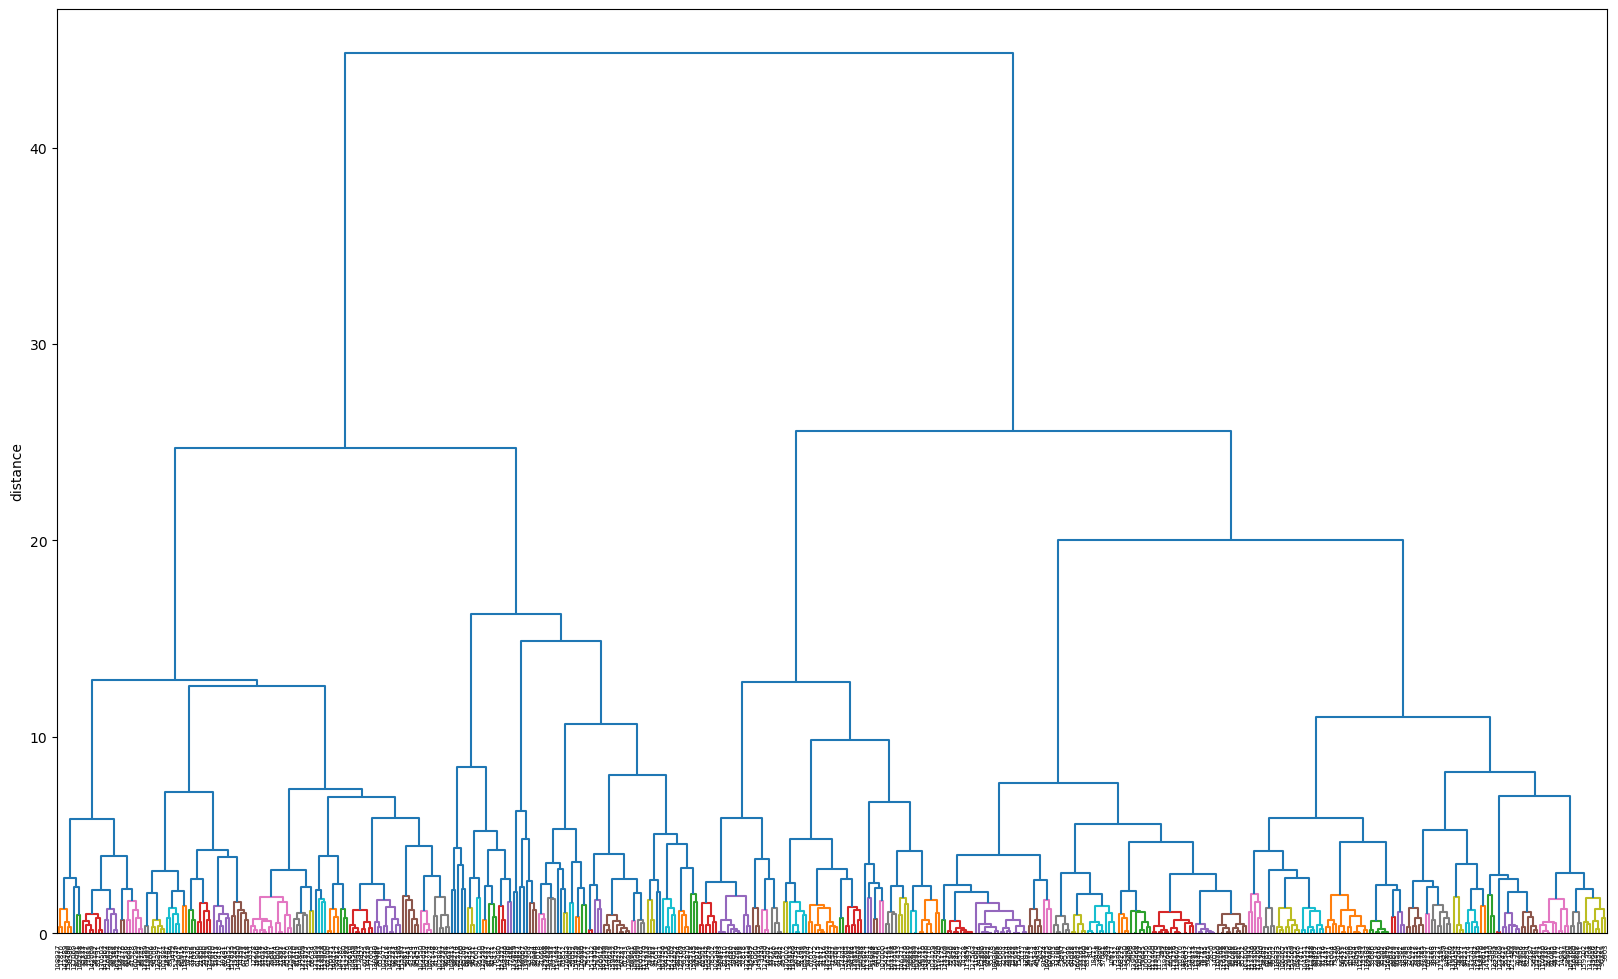

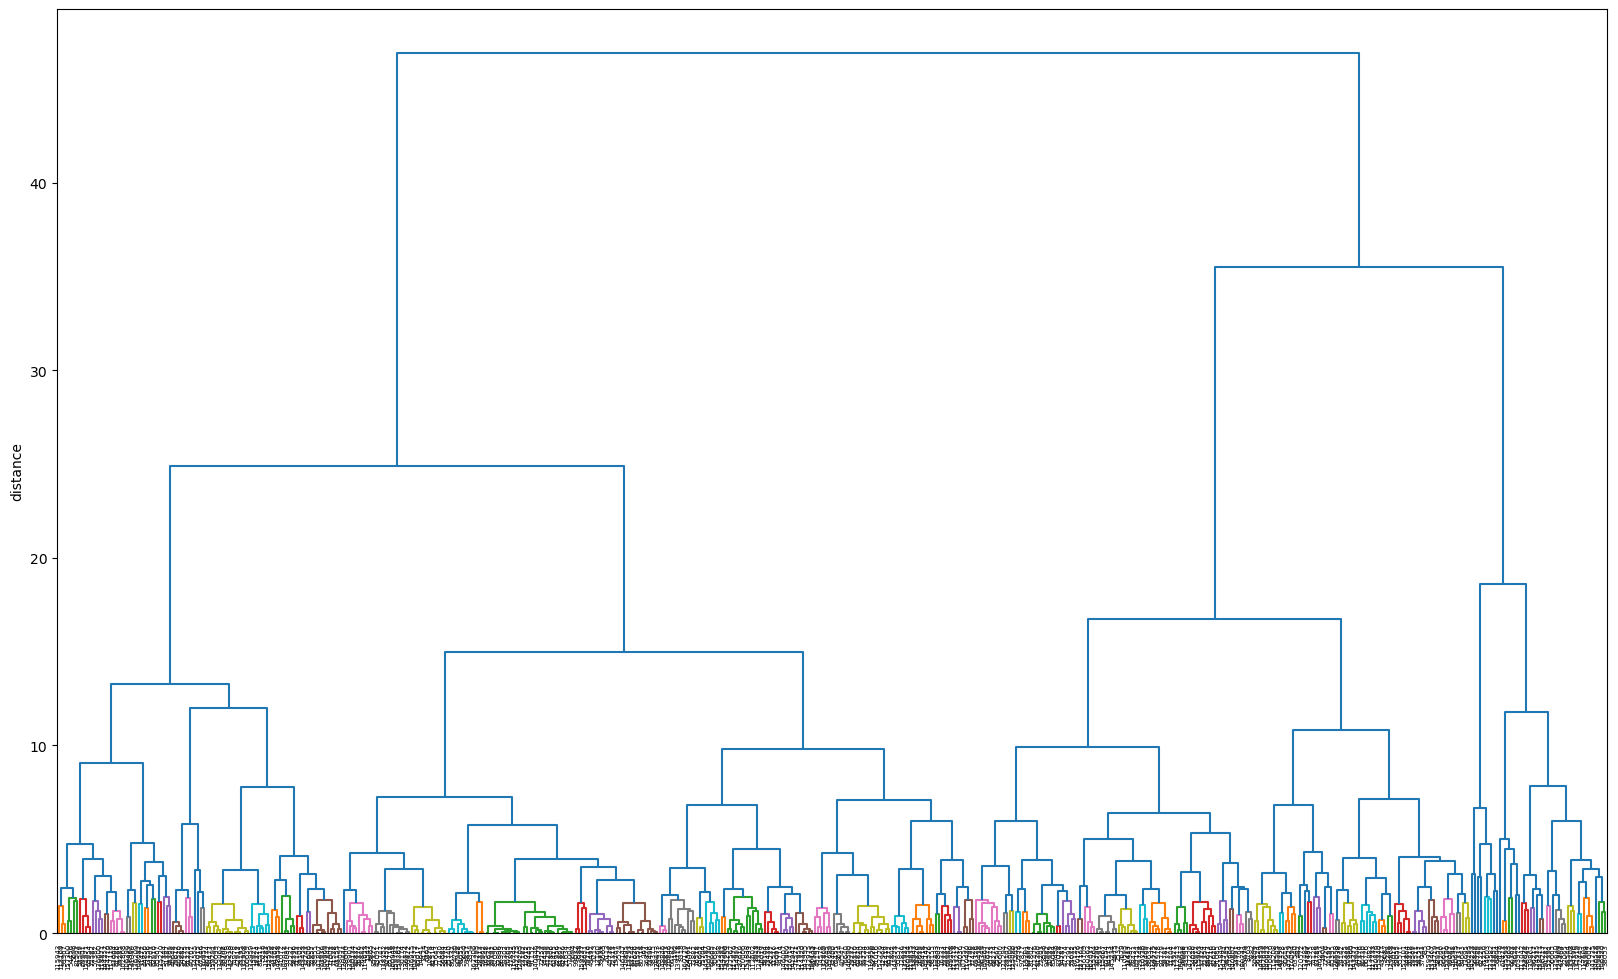

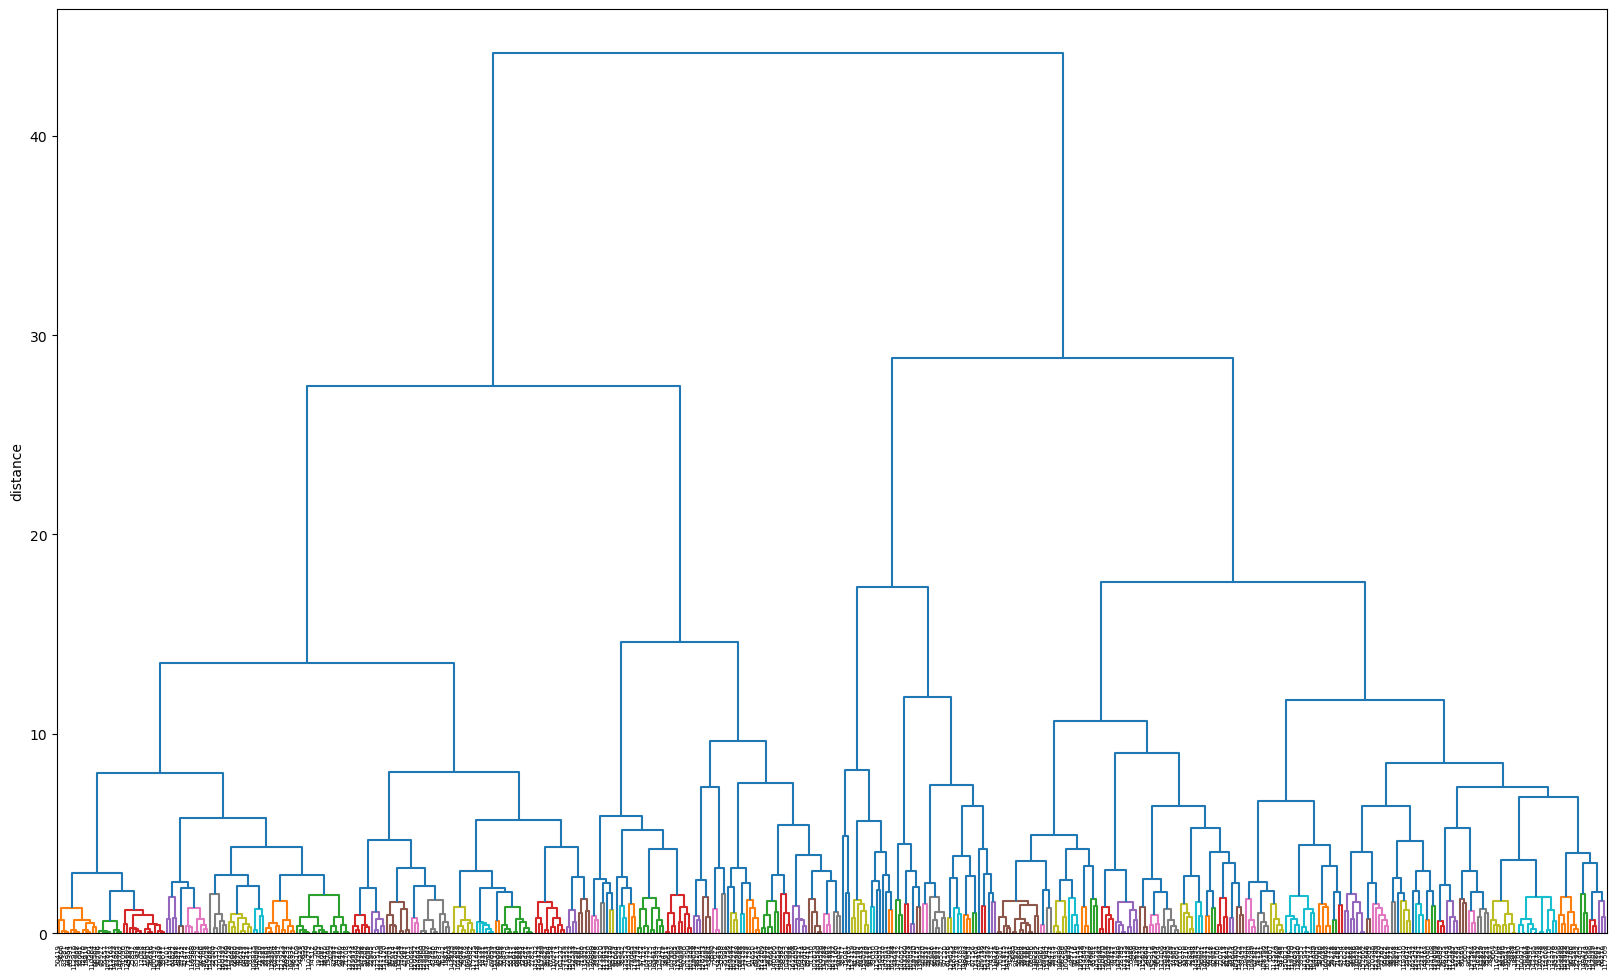

In [149]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()



import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

#### Based on dendrogram , we can observe there are 4 clusters in the data based on similarity  

#### Further checking appropriate number of clusters using Elbow Method using k-Means clustering : 

## KMeans and Elbow method

In [150]:
for i in range(1,10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k,
               random_state=654)
    y_pred = kM.fit_predict(X_sc)


In [151]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1140166.9999999998,
 775054.4295111096,
 633247.7223051763,
 551271.1752209156,
 494989.60171362327,
 455370.7086296082,
 419683.5015521751,
 391674.841039793,
 366932.12750637834]

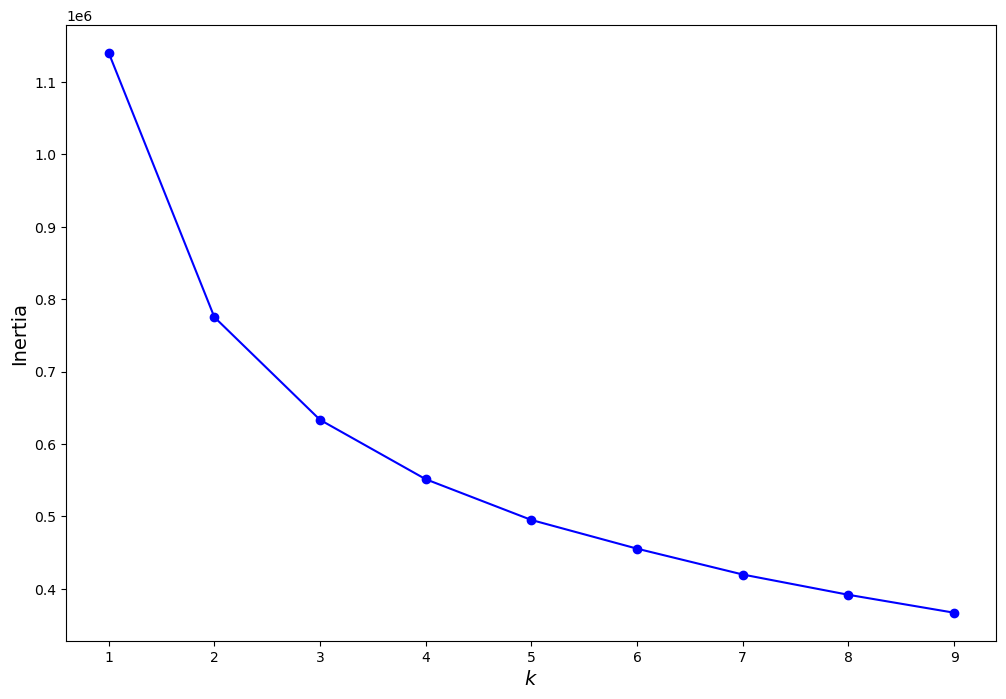

In [169]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.annotate('Elbow',
#             xy=(3, inertias[2]),
 #            xytext=(0.55, 0.55),
 #            textcoords='figure fraction',
 #            fontsize=16,
 #            arrowprops=dict(facecolor='black', shrink=0.1)
   #         )
plt.show()

# KMeans with n_clusters = 3

In [153]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,
           random_state=654)
y_pred = kM.fit_predict(X_sc)


In [154]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [155]:
clusters.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier,label
136721,cbfvqt,2012,1150000,frontend engineer,2019.0,11,3,3,3,1
49720,wxowg,2011,1600000,backend engineer,2017.0,12,2,2,2,0
120021,xzzgcvwwtq,2013,1050000,devops engineer,2019.0,10,2,3,3,1
46014,xmb xzaxv uqxcvnt rxbxnta,2007,850000,backend engineer,2021.0,16,3,2,2,0
162600,Others,2012,1000000,Others,2015.0,11,3,2,2,0


In [156]:
clusters.shape

(162881, 10)

# Insights |  EDA after Clustering : 

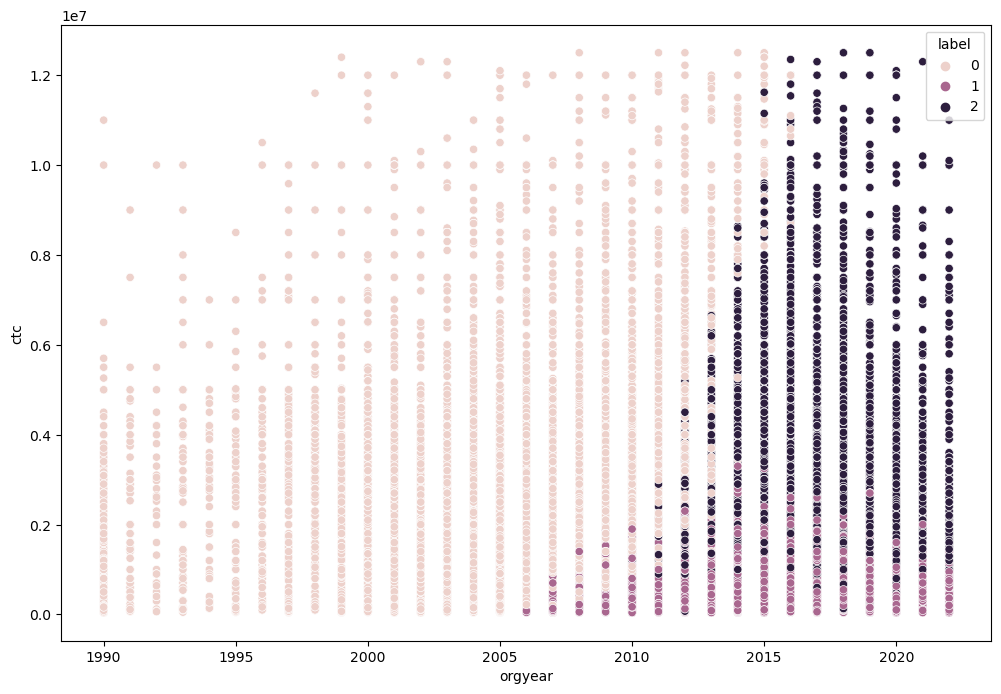

In [158]:
sns.scatterplot(x=clusters["orgyear"], y=clusters["ctc"], hue=clusters["label"])
plt.show()

#### based on above scatter plot , we can observe , a cluster of learners received CTC upto 30 LPA  who joined after 2006-07.
#### there's a group of learners who are very much experienced.
#### and also learners joined after 2012-13 receiving CTC between 20 LPA to upto 1.25cr.

<Axes: xlabel='label'>

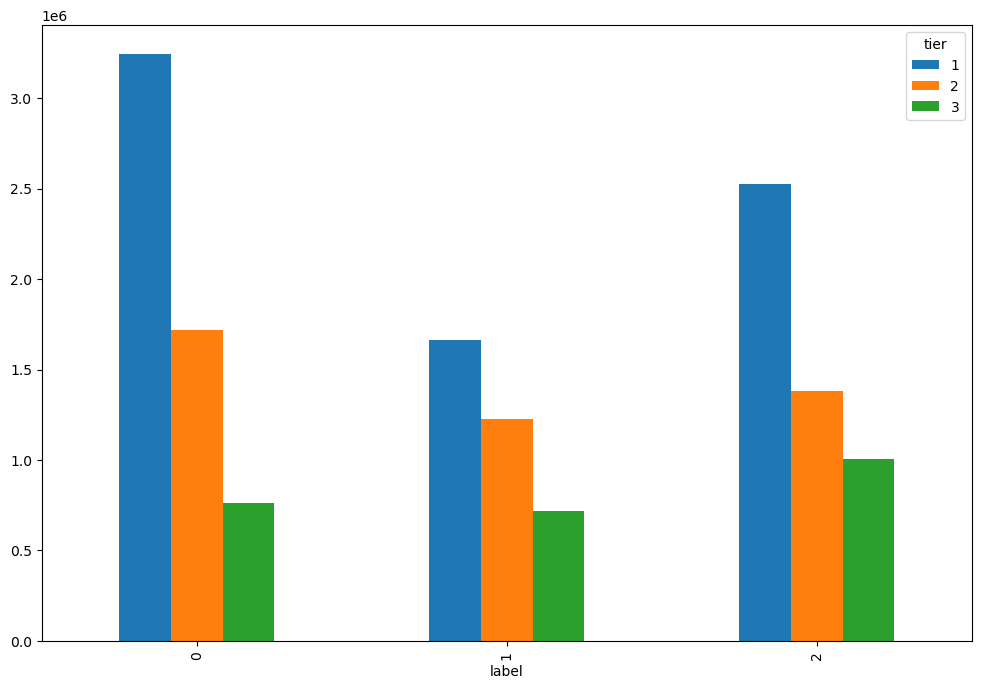

In [159]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

### Based on k-Means Clustering algorithm output  , as well as manual clustering , learners from tier1 company receiving very high CTC. 


<Axes: xlabel='label'>

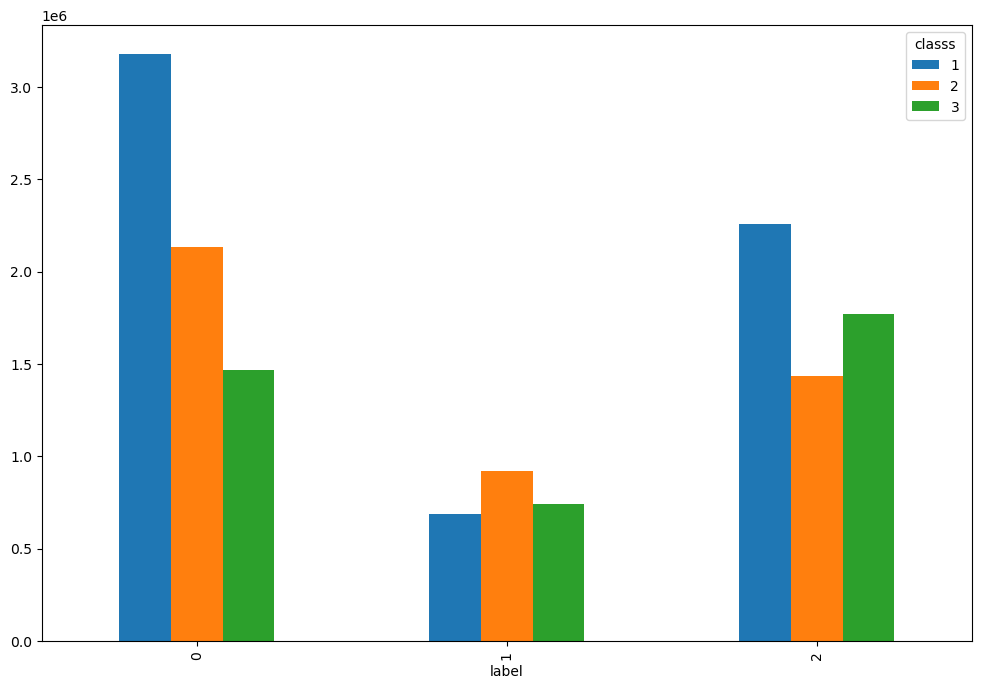

In [160]:
pd.crosstab(index = clusters["label"],
    columns = clusters["classs"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<Axes: xlabel='label'>

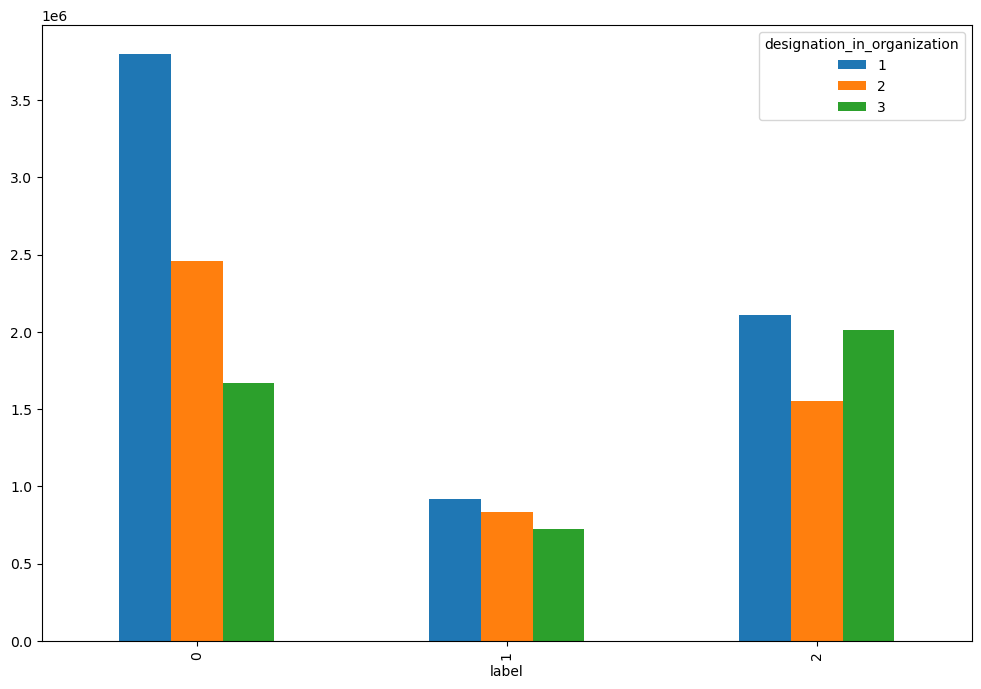

In [161]:
pd.crosstab(index = clusters["label"],
    columns = clusters["designation_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<Axes: xlabel='years_of_experience_in_organization'>

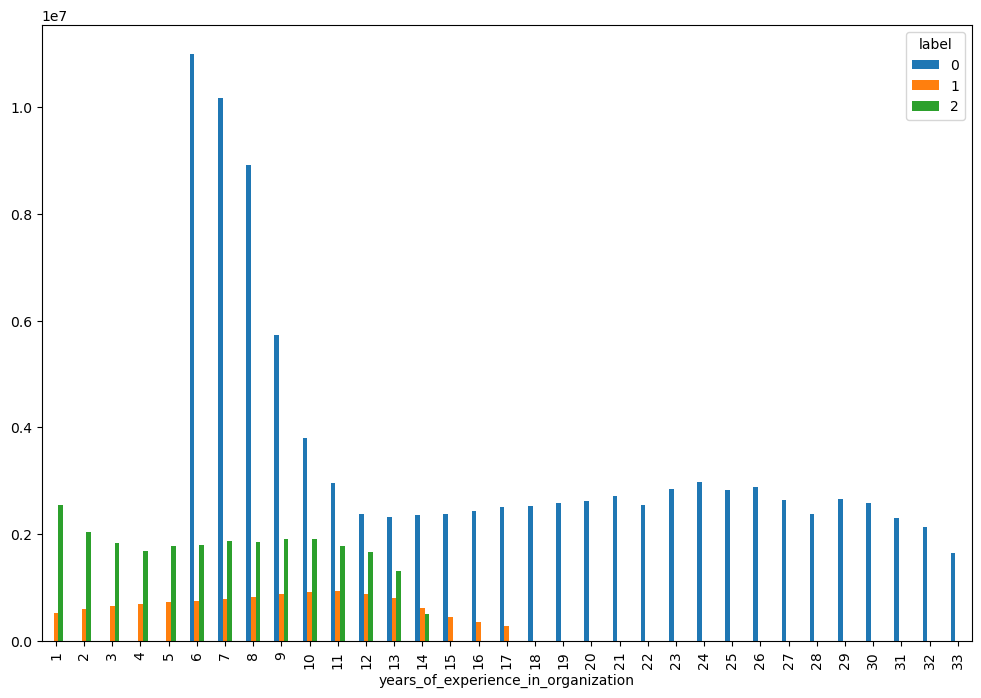

In [162]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

### Cluster label  0 , are those learners who are very very experienced,
### experienced learners between 6 to 10 years of experience, earning above 40 LPA up tp 1.5Cr. 

<Axes: xlabel='years_of_experience_in_organization'>

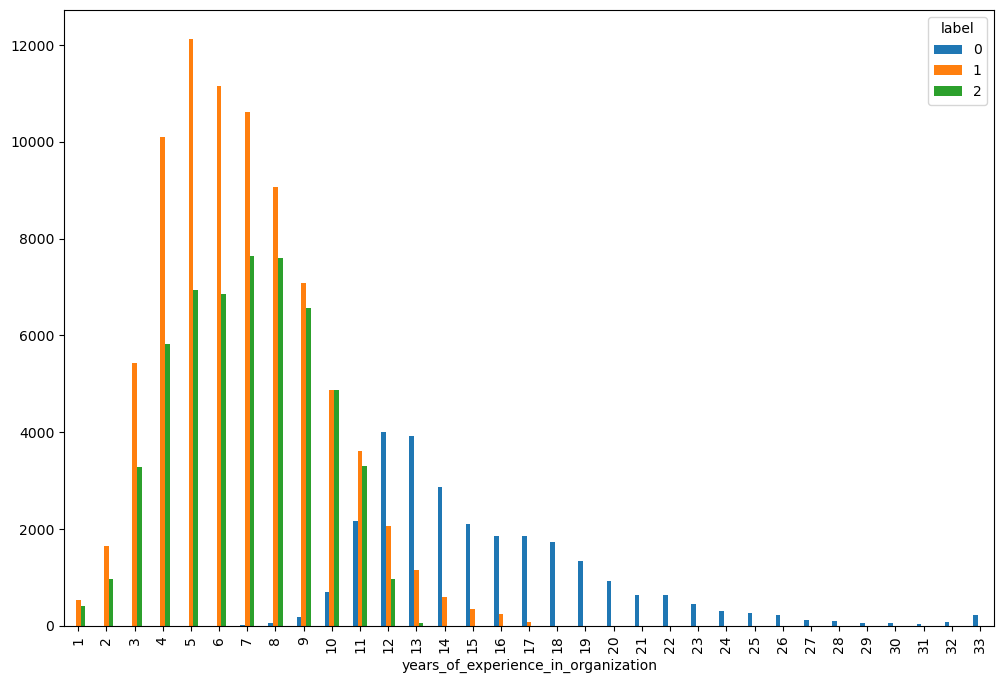

In [163]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            
       ).plot(kind = "bar")

#### Majority of Learners are experienced between 1 to 15 years . (49.56%)- (Cluster 1)
#### there is a group of learners having 8 to upto 33 years of experience. (33.93%) - (Cluster 2)
#### 16.52% of learners who have experiences - (cluster 0) 

In [164]:
clusters.label.value_counts(normalize=True)*100

1    49.557039
2    33.926609
0    16.516352
Name: label, dtype: float64

####  years_of_experience_in_organization per each cluster group of learners 

<Axes: xlabel='label'>

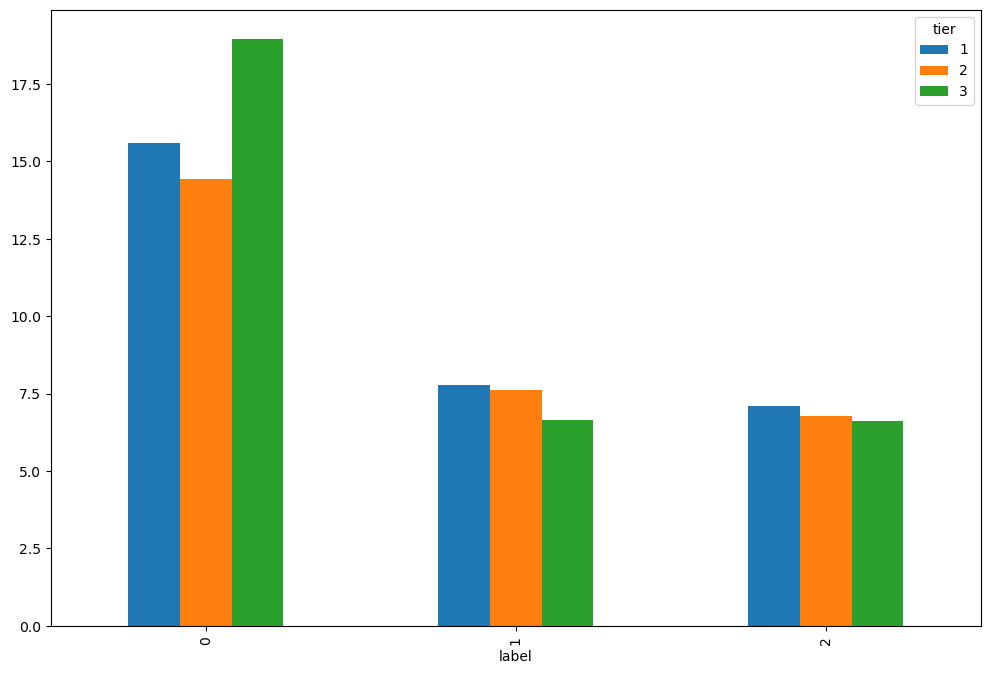

In [165]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],
            values=clusters["years_of_experience_in_organization"],
            aggfunc=np.mean
       ).plot(kind = "bar")

In [166]:
clusters.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization', 'designation_in_organization',
       'classs', 'tier', 'label'],
      dtype='object')

### Statistical Summury based on Each Cluster : 

In [167]:
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience_in_organization"]].T

label                                                 0             1  \
ctc                                 count  2.690200e+04  8.071900e+04   
                                    mean   2.567945e+06  7.721017e+05   
                                    std    1.763374e+06  5.132420e+05   
                                    min    4.000000e+04  3.800000e+04   
                                    25%    1.450000e+06  4.030000e+05   
                                    50%    2.160000e+06  6.500000e+05   
                                    75%    3.200000e+06  1.000000e+06   
                                    max    1.250000e+07  5.600000e+06   
classs                              count  2.690200e+04  8.071900e+04   
                                    mean   1.629358e+00  2.824738e+00   
                                    std    6.998365e-01  3.809424e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  3.000000e+00   
                                    50%    2.000000e+00  3.000000e+00   
                                    75%    2.000000e+00  3.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
tier                                count  2.690200e+04  8.071900e+04   
                                    mean   1.475727e+00  2.896914e+00   
                                    std    6.501709e-01  3.063866e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  3.000000e+00   
                                    50%    1.000000e+00  3.000000e+00   
                                    75%    2.000000e+00  3.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
years_of_experience_in_organization count  2.690200e+04  8.071900e+04   
                                    mean   1.553535e+01  6.758483e+00   
                                    std    4.331037e+00  2.734619e+00   
                                    min    6.000000e+00  1.000000e+00   
                                    25%    1.200000e+01  5.000000e+00   
                                    50%    1.400000e+01  6.000000e+00   
                                    75%    1.800000e+01  8.000000e+00   
                                    max    3.300000e+01  1.700000e+01   

label                                                 2  
ctc                                 count  5.526000e+04  
                                    mean   1.831573e+06  
                                    std    1.304987e+06  
                                    min    6.500000e+04  
                                    25%    1.000000e+06  
                                    50%    1.500000e+06  
                                    75%    2.200000e+06  
                                    max    1.250000e+07  
classs                              count  5.526000e+04  
                                    mean   1.536482e+00  
                                    std    5.268012e-01  
                                    min    1.000000e+00  
                                    25%    1.000000e+00  
                                    50%    2.000000e+00  
                                    75%    2.000000e+00  
                                    max    3.000000e+00  
tier                                count  5.526000e+04  
                                    mean   1.643250e+00  
                                    std    5.782173e-01  
                                    min    1.000000e+00  
                                    25%    1.000000e+00  
                                    50%    2.000000e+00  
                                    75%    2.000000e+00  
                                    max    3.000000e+00  
years_of_experience_in_organization count  5.526000e+04  
                                    mean   6.911003e+00  
                        

## Insights and Recommendations

#### Insights
- Top Paying job titles in 50th percentile include cto ,vice president, staff software engineer ,solutions architect,engineering manager ii,computer scientist ,software enginner ,sdei,software development engineer ,sr technical architect
- The largest cluster consists of almost 50% learners
- CTC increases with years of experience but after that it decreases and becomes constant
- Most employment happened in 2018 then decreased


#### Recommendations
##### Personalized Learning Paths:

Utilize cluster insights to tailor learning paths and course recommendations for learners based on their job profiles, company affiliations, and skill levels.
Offer customized learning experiences that address the specific needs and career aspirations of each cluster, ensuring maximum engagement and skill acquisition.
##### Peer Collaboration and Networking:

Facilitate peer collaboration and networking opportunities within each cluster to encourage knowledge sharing, collaboration on projects, and mutual support.
Create virtual communities or forums where learners within the same cluster can connect, exchange ideas, and build professional relationships.
##### Career Guidance and Mentorship:

Provide targeted career guidance and mentorship programs tailored to the career trajectories and aspirations of learners within each cluster.
Match learners with mentors who have relevant industry experience and expertise in their specific job profiles and companies, offering valuable insights and advice.
##### Industry-Specific Skill Development:

Offer specialized courses and workshops designed to enhance skills that are particularly relevant to learners' job profiles and industries.
Partner with industry leaders and subject matter experts to deliver content that reflects the latest trends and technologies in each cluster's respective fields.
##### Job Placement Support:

Develop job placement support services customized to the needs of each cluster, including resume assistance, interview preparation, and job matching services.
Leverage insights from cluster analysis to identify high-demand job roles and companies within each cluster, guiding learners towards lucrative career opportunities.
##### Continuous Learning and Upskilling:

Encourage learners to engage in continuous learning and upskilling activities to stay competitive in their respective industries.
Provide access to ongoing training resources, professional development opportunities, and certification programs tailored to the evolving needs of each cluster.
##### Feedback and Course Improvement:

Collect feedback from learners within each cluster to identify areas for course improvement, curriculum updates, and instructional enhancements.
Use cluster-specific feedback to iterate on course content, delivery methods, and learning materials, ensuring alignment with learners' preferences and learning styles.
##### Community Building and Engagement:

Foster a sense of community and belonging among learners within each cluster through virtual events, group projects, and social activities.
Organize cluster-specific meetups, webinars, and networking events to facilitate meaningful connections and peer-to-peer support.
